# DATA-585 Assignment 1
By: Dhun Sheth

## Part I

### 1. The Rosenkbrock's banana function:

**Problem Classification:**
1. The problem contains $x_1^4$ hence it is a non-linear function.
2. The function is smooth becuase it's continuous and differentiable for all $x_1$ and $x_2$.
3. The problem is unconstrained because there are no constraints/bounds.
4. $x_1$ and $x_2$ can be any real number and so it is not restricted to just integers.
5. The function is non-convex because the eigen values of the Hessian matrix can have negative values, ie. its not non-negative. 

**MATLAB solver to use:** fminunc (unconstrained minimization)       

**Best algorithm to use:** The unconstrained minimization involves using the gradient descent algorithm for solving the optimization problem.      

The fminunc solver was chosen because the problem is seeking to find a minimum and it is unconstrained. The scaler solver does not work here because x1 and x2 are not neccessarily scalors, and they are not constrained to be integers. In addition, it doesn't satisfy the quadratic form. Thus fminunc was chosen.     

In addition, the gradient descent algorithm is straight forward to implement, however, the learning rate must be fine tuned, and this problem has more than 1 local minima, so when solving, should be careful the algorithm doesn't get stuck in the local minima and actually finds the global minimum. 

### 2. The optimization problem given:

**Problem Classification:**
1. The problem contains multiple variables multiplied together so it is not linear nor quadratic, hence it is a non-linear function.
2. The function is smooth becuase it's continuous and differentiable for all $x$ and $y$.
3. The problem is constrained because there are defined constraints/bounds on x and y.
4. $x$ and $y$ can be any real number and so it is not restricted to just integers.
5. The function is non-convex because the eigen values of the Hessian matrix can have negative values, ie. its not non-negative. 

**MATLAB solver to use:** fmincon (constrained minimization)         
     
**Best algorithm to use:** fmincon uses the sequential quadratic programming. The idea of this algorithm is to build a quadratic approximation of the objective function using local information. It then searches for a direction from the current point which minimizes the quadratic approximation of the objective function, while satisfying the constraints - this is repeated until it converges to the solution.    

Because the problem is non-linear and not quadratic, the quadratic or linear programming solver cannot be used. In addition, it is constrained, so the unconstrained minimization cannot be used, x and y are not neccessarily scalars or integers, and so fmincon is the best option. The constraints are not absolute valued, so no need to consider cone programming. 

### 3. The optimization problem given:

**Problem Classification:**
1. The problem contains multiple variables multiplied together so it is not linear nor quadratic, hence it is a non-linear function.
2. The function is smooth becuase it's continuous and differentiable for all $x$ and $y$.
3. The problem is constrained because there are defined constraints/bounds on x and y.
4. $x$ and $y$ can be any real number and so it is not restricted to just integers.
5. The function is non-convex because the eigen values of the Hessian matrix can have negative values, ie. its not non-negative. 

**MATLAB solver to use:** fmincon (constrained minimization)     

**Best algorithm to use:** fmincon uses the sequential quadratic programming. The idea of this algorithm is to build a quadratic approximation of the objective function using local information. It then searches for a direction from the current point which minimizes the quadratic approximation of the objective function, while satisfying the constraints - this is repeated until it converges to the solution.     

Because the objective function is non-linear, problem is constrained, and has a finite number of constraints, using fmincon makes the most sense for this problem. Similar to the above, xy, is not neccessarily a scalar, integers, linear, quadratic, or have absolute value constraints, those solvers were not considered as a result. 

## Part II

Optimization problem given:  $min (x,y) \{xy: 5*x^2 + 20*y^2 ≤ 3\}$     

In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


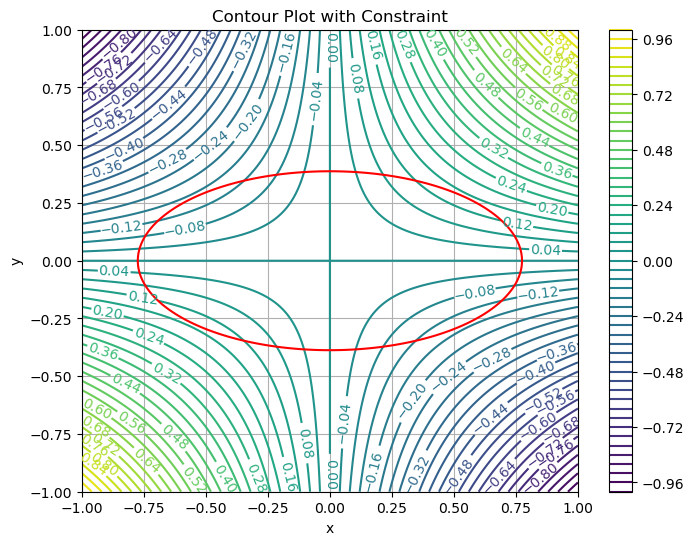

In [2]:
def obj(x, y):
    return x * y

def const(x, y):
    return 5*x**2 + 20*y**2 - 3

x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x, y)
Z = obj(X, Y)

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contour, inline=1, fontsize=10)
plt.colorbar(contour)

plt.contour(X, Y, const(X, Y), levels=[0], colors='red')

plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Constraint')
plt.grid(True)

plt.show()

In [6]:
def obj(x):
    return x[0] * x[1]

constraints = [
    {'type': 'ineq', 'fun': lambda x: -5*x[0]**2 - 20*x[1]**2 + 3}
]

bounds = [(None, None), (None, None)]

x0 = [0.25, 0.15]

result = minimize(obj, x0, method='SLSQP', bounds=bounds, constraints=constraints)
print(result)

     fun: -0.15000000000768798
     jac: array([-0.27386127,  0.54772257])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 0.54772257, -0.27386127])
